In [1]:
from pathlib import Path
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results_dir = Path("../2.evalzoo/results/")
mertrics_filename = "metrics_level_1_ref"

metrics_columns = [
    "sim_retrieval_r_precision_ref_i_mean_i",
    "sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i",
    "sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i"
    ]

metrics = {
    "subset": {
        "same_well_diff_pert": "36b3f8cc",
        "same_pert_diff_well": "989f0fd4",
        "same_well_same_pert": "d084f01e",
    },
    "subset_corrected": {
        "same_well_diff_pert": "dba427db",
        "same_pert_diff_well": "fe519d51",
        "same_well_same_pert": "e632fcd7",
    },
}


In [3]:
metrics_dfs = []

for subset, configs in metrics.items():
    for config, config_dir in configs.items():
        metrics_path = results_dir / config_dir / f"{mertrics_filename}.parquet"
        metrics_df = pd.read_parquet(metrics_path, columns=metrics_columns)
        metrics_df.columns = ["mAP", "-log(pvalue)", "-log(qvalue)"]
        metrics_df["config"] = config
        metrics_df["subset"] = subset
        metrics_df["p<0.05"] = metrics_df["-log(pvalue)"] > 1.3
        metrics_dfs.append(metrics_df)

In [4]:
metrics_df = pd.concat(metrics_dfs, axis=0)
metrics_df.shape

(14758, 6)

same_well_diff_pert subset mmAP: 0.0397
same_well_diff_pert subset_corrected mmAP: 0.0581


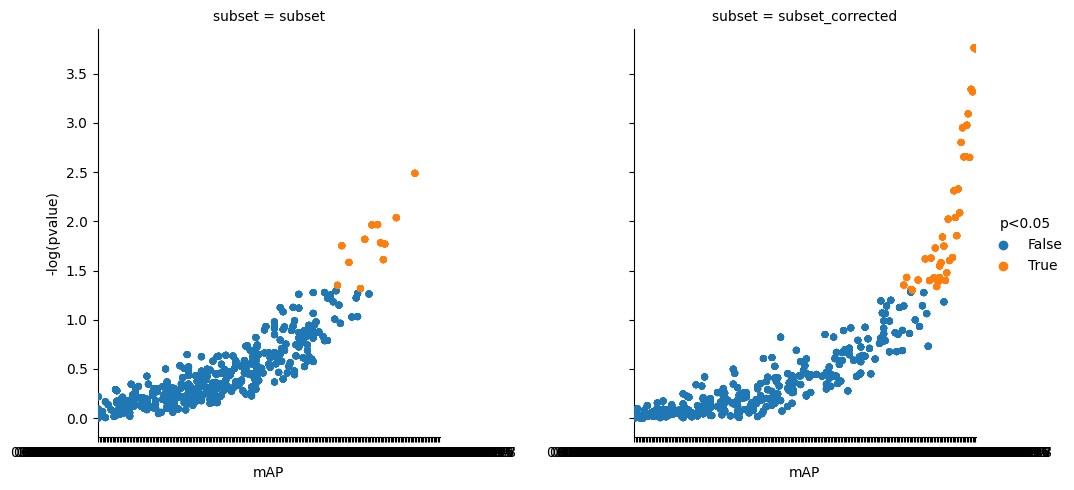

same_pert_diff_well subset mmAP: 0.00338
same_pert_diff_well subset_corrected mmAP: 0.0


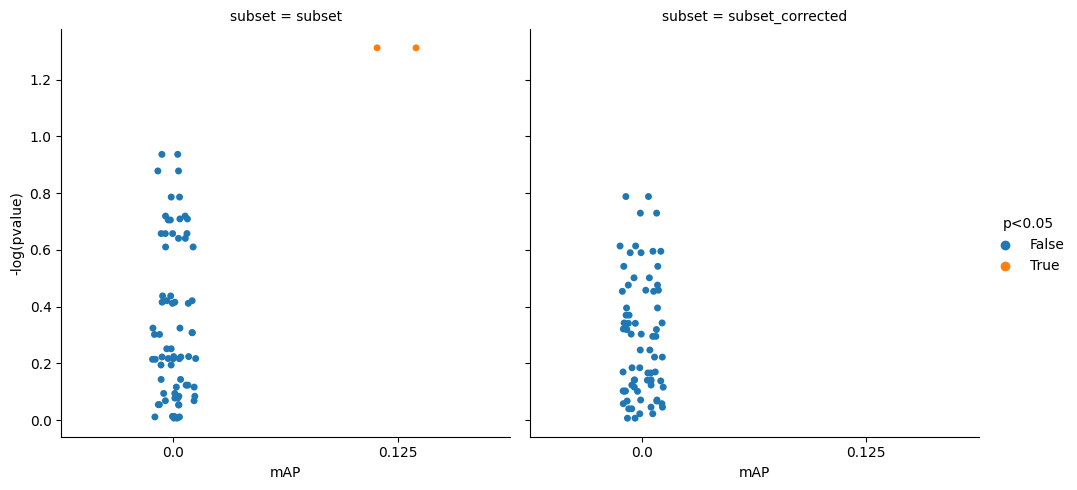

same_well_same_pert subset mmAP: 0.144
same_well_same_pert subset_corrected mmAP: 0.192


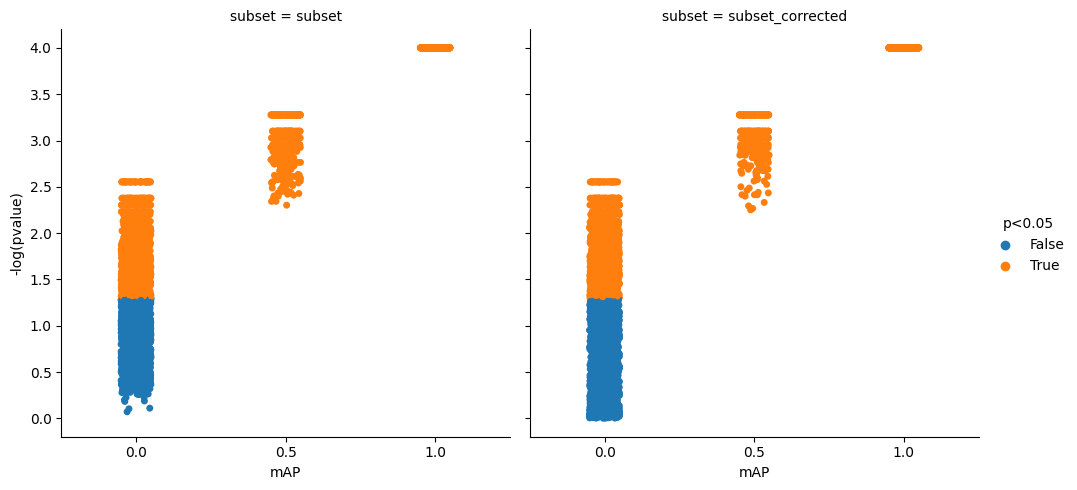

In [5]:
for config in metrics_df.config.unique():
    config_df = metrics_df[metrics_df.config==config]
    for subset in config_df.subset.unique():
        print(config, subset, f"mmAP: {config_df[config_df.subset==subset].mAP.mean():.03}")
    sns.catplot(data=config_df, x="mAP", y="-log(pvalue)", col="subset", hue="p<0.05")
    plt.show()